In [1]:
#Importing Packages
import Models.Classifier as Classifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote=SMOTE()

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Defining the data sample of 0.01% of entire data
data=pd.read_parquet('/home/hashmi/Files/DataFolder/UpgradeSeedClassifier-Origin/InitialAnalysis/data/true_no_hits_15114101.parquet')[
    ['track_chi2PerDoF','track_nLHCbIDs','track_p',
     'track_phi','track_position_x', 'track_position_y',
     'track_position_r','track_tx', 'track_ty',
     'track_pseudoRapidity','particle_isDown_noVelo']].sample(frac=0.01)

In [58]:
#Defining Dependent and Independent Variables, Splitting the data
x=data.drop('particle_isDown_noVelo',axis=1)
y=data['particle_isDown_noVelo']
x,y=smote.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=6,shuffle=True)


In [59]:
model_output=[]
for i,v in x.iterrows():
    output_value=Classifier.apply_catboost_model(v.values)
    model_output.append(output_value)

In [60]:
x['ModelOutput']=model_output
x['Probability']=np.exp(model_output)/(1+np.exp(model_output))
x['Label']=y

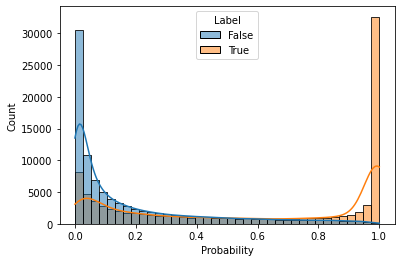

In [61]:
sns.histplot(data=x,x='Probability',hue='Label',kde=True)
plt.show()

In [53]:
# zero=data.loc[data['particle_isDown_noVelo']==False].sample(1000)

# one=data.loc[data['particle_isDown_noVelo']==True].sample(1000)


# combined=pd.concat([zero,one])


In [3]:
data.head(25)

,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_x,track_position_y,track_position_r,track_tx,track_ty,track_pseudoRapidity,particle_isDown_noVelo
88,1.604573,9.0,25383.925520,2.245130,193.057007,31.660641,195.635897,-0.002913,0.003644,6.060697,True
82,0.161569,12.0,28597.461243,-0.370727,599.067505,-303.705444,671.653834,0.106972,-0.041580,2.861261,False
94,1.669996,11.0,2433.643354,-0.417661,-525.229126,-1137.296143,1252.720300,0.262663,-0.116562,1.960182,False
32,0.203353,12.0,2539.398723,0.101998,-860.523682,169.493942,877.057126,0.183374,0.018769,2.392551,False
120,0.805185,11.0,3673.675114,-0.051374,435.567535,-112.898132,449.961183,0.269903,-0.013878,2.019299,False
234,0.224877,12.0,8147.522675,2.529618,-898.511169,1191.561646,1492.361041,-0.225518,0.158283,2.000699,False
65,2.216415,12.0,2833.459270,3.125640,-843.428406,65.204361,845.945084,-0.409543,0.006534,1.625260,False
53,0.246918,12.0,18533.644723,0.200476,187.497696,101.496590,213.206341,0.066273,0.013467,3.388032,False
105,0.144732,12.0,53310.056830,3.077146,-191.157303,12.021972,191.534963,-0.039450,0.002546,3.924187,True
76,0.431743,12.0,4310.083391,-3.126481,-594.263123,-2.053756,594.266671,-0.263374,-0.003980,2.044126,False
